<a href="https://colab.research.google.com/github/VamsiMaruturi/VITBML-EDA2/blob/master/vamsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import os
from sklearn.cluster import KMeans
import math


In [25]:
np.random.RandomState(seed=1)
covid_df = pd.read_csv(r"/content/03-26-2020.csv")
columns_required=["Lat","Long_","Confirmed","Deaths","Recovered"]
covid_df=covid_df[columns_required]
covid_df

,Lat,Long_,Confirmed,Deaths,Recovered
0,34.223334,-82.461707,3,0,0
1,30.295065,-92.414197,3,0,0
2,37.767072,-75.632346,2,0,0
3,43.452658,-116.241552,39,0,0
4,41.330756,-94.471059,1,0,0
...,...,...,...,...,...
3416,6.423800,-66.589700,107,0,15
3417,14.058324,108.277199,153,0,20
3418,31.952200,35.233200,84,1,17
3419,-13.133897,27.849332,16,0,0


In [0]:
confirmed_arr = []
deaths_arr=[]
recovered_arr = []
for i,row in enumerate(covid_df.iterrows()):
  data_row = pd.DataFrame([row[1]])
  confirmed_arr=confirmed_arr+[[data_row["Lat"][i],data_row["Long_"][i]]]*int(data_row["Confirmed"][i])
  deaths_arr=deaths_arr+[[data_row["Lat"][i],data_row["Long_"][i]]]*int(data_row["Deaths"][i])
  recovered_arr=recovered_arr+[[data_row["Lat"][i],data_row["Long_"][i]]]*int(data_row["Recovered"][i])


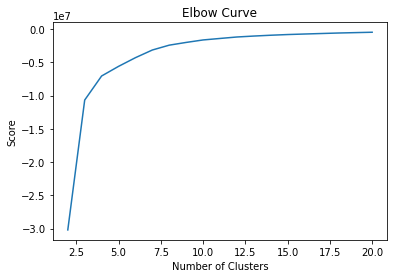

In [27]:
k_means = [KMeans(n_clusters=i,random_state=0) for i in range(2,21)]
score = [k_means[i].fit(recovered_arr).score(recovered_arr) for i in range(19)]
plt.plot(range(2,21),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

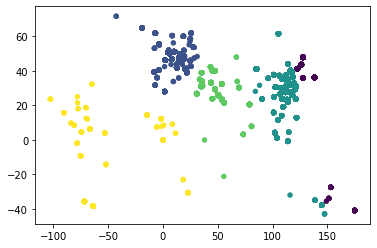

In [28]:
k_means_5 = KMeans(n_clusters=5,random_state=0)
k_means_5.fit(recovered_arr)
y_kmeans_5=k_means_5.predict(recovered_arr)
plt.scatter(np.array(recovered_arr)[:,1],np.array(recovered_arr)[:,0],c=y_kmeans_5, s=20, cmap='viridis')


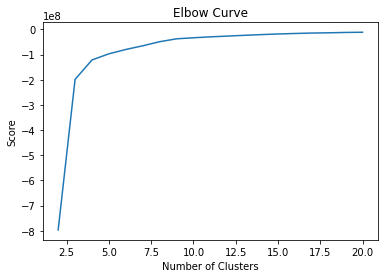

In [29]:
k_means = [KMeans(n_clusters=i,random_state=0) for i in range(2,21)]
score = [k_means[i].fit(confirmed_arr).score(confirmed_arr) for i in range(19)]
plt.plot(range(2,21),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

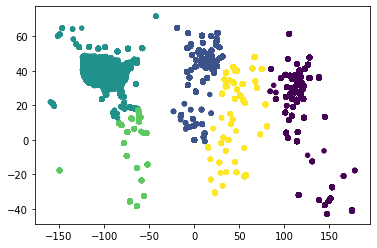

In [30]:
k_means_optimal_5 = KMeans(n_clusters=5,random_state=0)
k_means_optimal_5.fit(confirmed_arr)
y_kmeans_optimal_5=k_means_optimal_5.predict(confirmed_arr)
plt.scatter(np.array(confirmed_arr)[:,1],np.array(confirmed_arr)[:,0],c=y_kmeans_optimal_5, s=20, cmap='viridis')

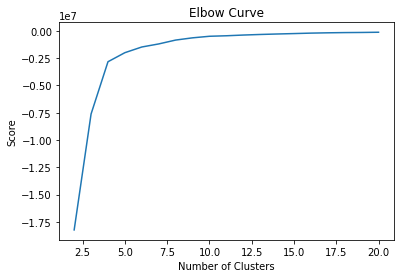

In [31]:
k_means = [KMeans(n_clusters=i,random_state=0) for i in range(2,21)]
score = [k_means[i].fit(deaths_arr).score(deaths_arr) for i in range(19)]
plt.plot(range(2,21),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

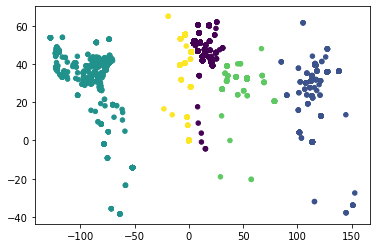

In [32]:
k_optimal_5 = KMeans(n_clusters=5,random_state=0)
k_optimal_5.fit(deaths_arr)
y_optimal_5=k_optimal_5.predict(deaths_arr)
plt.scatter(np.array(deaths_arr)[:,1],np.array(deaths_arr)[:,0],c=y_optimal_5, s=20, cmap='viridis')

In [0]:
df_confirmed=pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
confirmed_df=[]
for i,row in enumerate(df_confirmed.iterrows()):
  data=pd.DataFrame([row[1]])
  confirmed_df=confirmed_df+[[data["Lat"][i],data["Long"][i]]]


In [34]:
diff_b=[]
lat_long = []
for i in range(df_confirmed.shape[0]):
  data=df_confirmed.iloc[[i]]
  a = list(data.iloc[0,4:])
  if 0 in a:
    a.remove(0)
  b=pd.Series(a)
  b_diff = b.diff()
  b_diff = pd.Series([value for value in b_diff if not math.isnan(value)])
  mean_diff = b_diff.mean()
  diff_b.append(mean_diff)
clusters = k_means_optimal_5.predict(confirmed_df)
cluster_centers = k_means_optimal_5.cluster_centers_
dict_clusters = dict(zip(range(5),cluster_centers))

df_confirmed["Lat_Long_predicted"]=(clusters)
df_confirmed["confirmed_rate"] = list(diff_b)
df_confirmed = df_confirmed[["Lat_Long_predicted","confirmed_rate"]]
df_mean_c = df_confirmed.groupby(by="Lat_Long_predicted").mean()
df_mean_c["Cluster_centers"] = list(k_means_optimal_5.cluster_centers_)
df_mean_c = df_mean_c.reset_index()
df_mean_c =df_mean_c.drop(labels="Lat_Long_predicted",axis=1)
df_mean_c


,confirmed_rate,Cluster_centers
0,24.909366,"[28.41360113742521, 115.13177477421532]"
1,61.103604,"[45.012130573339086, 6.302133506379997]"
2,46.443428,"[39.95674522712829, -83.303267948814]"
3,4.816092,"[-12.614099907784542, -66.12693118001533]"
4,13.820106,"[30.379221325594116, 50.224418174542315]"


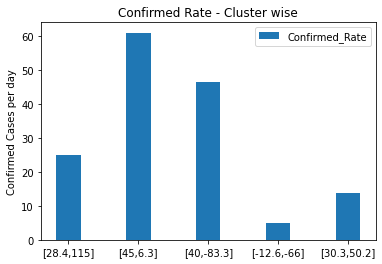

In [35]:
labels=["[28.4,115]","[45,6.3]","[40,-83.3]","[-12.6,-66]","[30.3,50.2]"]
df_mean_c = list(df_mean_c["confirmed_rate"])
x=np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

confirmed = ax.bar(x ,df_mean_c, width, label='Confirmed_Rate')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Confirmed Cases per day')
ax.set_title('Confirmed Rate - Cluster wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#COVID-19
THE ABOVE GRAPH SAYS THAT AT THE LATITUDE 45 AND LONGITUDE 6.3 i.e. IN FRANCE THERE ARE MORE TESITING KITS.SO,CONFIRMED CASES PREDICTED ARE MORE MUST TAKE MORE PRECAUTIONS

In [0]:
df_deaths=pd.read_csv('/content/time_series_covid19_deaths_global.csv')
deaths_df=[]
for i,row in enumerate(df_deaths.iterrows()):
  data=pd.DataFrame([row[1]])
  deaths_df=deaths_df+[[data["Lat"][i],data["Long"][i]]]


In [37]:
diff_b=[]
lat_long = []
for i in range(df_deaths.shape[0]):
  data=df_deaths.iloc[[i]]
  a = list(data.iloc[0,4:])
  if 0 in a:
    a.remove(0)
  b=pd.Series(a)
  b_diff = b.diff()
  b_diff = pd.Series([value for value in b_diff if not math.isnan(value)])
  mean_diff = b_diff.mean()
  diff_b.append(mean_diff)
clusters = k_optimal_5.predict(deaths_df)
cluster_centers = k_optimal_5.cluster_centers_
dict_clusters = dict(zip(range(5),cluster_centers))

df_deaths["Lat_Long_predicted"]=(clusters)
df_deaths["death_rate"] = list(diff_b)
df_deaths = df_deaths[["Lat_Long_predicted","death_rate"]]
df_mean_d = df_deaths.groupby(by="Lat_Long_predicted").mean()
df_mean_d["Cluster_centers"] = list(k_optimal_5.cluster_centers_)
df_mean_d = df_mean_d.reset_index()
df_mean_d =df_mean_d.drop(labels="Lat_Long_predicted",axis=1)
df_mean_d




,death_rate,Cluster_centers
0,3.193178,"[43.187428333127436, 12.061132295515069]"
1,0.887091,"[29.98586113305872, 113.398494739371]"
2,0.389984,"[33.56305629919779, -87.08175858625111]"
3,0.791059,"[32.39034394423977, 52.85361963222631]"
4,3.705820,"[42.00791008130675, -2.210718535040481]"


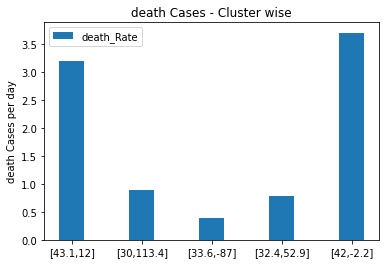

In [38]:
labels=["[43.1,12]","[30,113.4]","[33.6,-87]","[32.4,52.9]","[42,-2.2]"]
df_mean_d = list(df_mean_d["death_rate"])
x=np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

confirmed = ax.bar(x ,df_mean_d, width, label='death_Rate')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('death Cases per day')
ax.set_title('death Cases - Cluster wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

THE ABOVE GRAPH SAYS THAT AT THE LATITUDE 42 AND LONGITUDE -2.2 i.e. IN SPAIN THERE ARE LESS TESITING KITS AND HOSPITALS,EFFECTED PATIENTS DUE TO COVID-19 ARE MORE.SO,DEATH RATE IS  MORE MUST TAKE MORE PRECAUTIONS REMAININGG PEOPLE.

In [0]:
df_recovered=pd.read_csv('/content/time_series_covid19_recovered_global.csv')
recovered_df=[]
for i,row in enumerate(df_recovered.iterrows()):
  data=pd.DataFrame([row[1]])
  recovered_df=recovered_df+[[data["Lat"][i],data["Long"][i]]]


In [40]:
diff_b=[]
lat_long = []
for i in range(df_recovered.shape[0]):
  data=df_recovered.iloc[[i]]
  a = list(data.iloc[0,4:])
  if 0 in a:
    a.remove(0)
  b=pd.Series(a)
  b_diff = b.diff()
  b_diff = pd.Series([value for value in b_diff if not math.isnan(value)])
  mean_diff = b_diff.mean()
  diff_b.append(mean_diff)
clusters = k_means_5.predict(recovered_df)
cluster_centers = k_means_5.cluster_centers_
dict_clusters = dict(zip(range(5),cluster_centers))

df_recovered["Lat_Long_predicted"]=(clusters)
df_recovered["recovered_rate"] = list(diff_b)
df_recovered = df_recovered[["Lat_Long_predicted","recovered_rate"]]
df_mean_r = df_recovered.groupby(by="Lat_Long_predicted").mean()
df_mean_r["Cluster_centers"] = list(k_means_5.cluster_centers_)
df_mean_r = df_mean_r.reset_index()
df_mean_r = df_mean_r.drop(labels="Lat_Long_predicted",axis=1)
df_mean_r




,recovered_rate,Cluster_centers
0,6.383394,"[36.70418269395626, 128.64043343228352]"
1,8.599134,"[44.49738112582572, 6.214925797003303]"
2,22.820159,"[30.575375133215193, 112.5639396730023]"
3,4.614571,"[32.09161480419795, 53.18069407787967]"
4,0.309315,"[-1.758398713513742, -6.5212212348363465]"


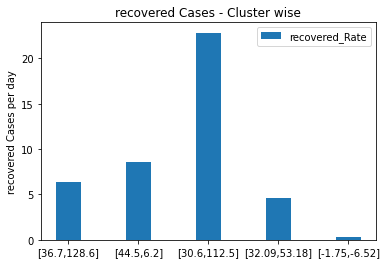

In [41]:
labels=["[36.7,128.6]","[44.5,6.2]","[30.6,112.5]","[32.09,53.18]","[-1.75,-6.52]"]
df_mean_r = list(df_mean_r["recovered_rate"])
x=np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
recovered = ax.bar(x ,df_mean_r, width, label='recovered_Rate')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('recovered Cases per day')
ax.set_title('recovered Cases - Cluster wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#COVID-19
THE ABOVE GRAPH SAYS THAT AT THE LATITUDE 30.6 AND LONGITUDE 112.5 i.e. IN CHINA, THERE ARE MORE TESITING KITS,HOSPITALS AND DOCTORS.SO,RECOVERED PEOPLE  ARE MORE . STAY HOME.

GROUP MEMBERS:
*   M.V.P.VAMSI-19PA1A05I8
*   S.AJITH KUMAR-19PA1A05G9
*   T.RAJ PRANAV-19PA1A05H3